In [175]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn import preprocessing
from sklearn import metrics

from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import discriminant_analysis
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier


In [176]:
lung = pd.read_csv('lung.txt', sep=',',header=0)
lung=lung.replace('?',0)
lung.head()

,1,0,3,0.1,0.2,0.3,2,2.1,2.2,1.1,1.2,1.3,1.4,3.1,2.3,2.4,1.5,2.5,2.6,0.4,2.7,2.8,2.9,2.10,1.6,2.11,2.12,2.13,3.2,2.14,1.7,1.8,1.9,3.3,3.4,2.15,2.16,1.10,2.17,2.18,2.19,1.11,2.20,2.21,2.22,2.23,2.24,2.25,2.26,2.27,2.28,2.29,1.12,1.13,1.14,2.30,2.31
0,1,0,3,3,1,0,3,1,3,1,1,1,1,1,3,3,1,2,2,0,0,2,2,2,1,2,1,3,2,3,1,1,1,3,3,2,2,2,1,2,2,2,1,2,2,1,2,2,2,2,2,2,2,2,1,2,2
1,1,0,3,3,2,0,3,3,3,1,1,1,0,3,3,3,1,2,1,0,0,2,2,2,1,2,2,3,2,3,1,3,3,3,1,2,2,1,2,2,2,1,2,2,1,2,2,2,2,2,2,2,2,2,2,1,2
2,1,0,2,3,2,1,3,3,3,1,2,1,0,3,3,1,1,2,2,0,0,2,2,2,2,1,3,2,3,3,1,3,3,3,1,1,1,1,2,2,2,2,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2
3,1,0,3,2,1,1,3,3,3,2,2,2,1,1,2,2,2,2,2,0,0,2,2,2,1,1,2,3,2,2,1,1,1,3,2,1,2,2,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,1,2,2
4,1,0,3,3,2,0,3,3,3,1,2,2,0,3,3,3,2,2,1,0,0,1,2,2,2,1,3,3,1,2,2,3,3,3,2,1,2,2,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,1,2


In [177]:
lung=lung.rename({'1': 'Cancer'}, axis=1)

In [178]:
# lung.Cancer.replace([2, 1], [1, 0], inplace=True)

In [179]:
lung['Cancer'].value_counts()

2    13
3    10
1     8
Name: Cancer, dtype: int64

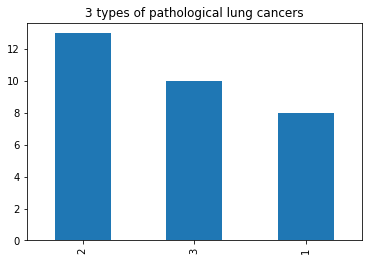

In [191]:
lung['Cancer'].value_counts().plot(title="3 types of pathological lung cancers", kind="bar")

In [180]:
# from sklearn.utils import resample

In [181]:
# data_majority = lung[lung.Cancer==1]
# data_minority = lung[lung.Cancer==0]
 
# data_minority_upsampled = resample(data_minority, 
#                                  replace=True,  
#                                  n_samples=21, 
#                                  random_state=4)

# data = pd.concat([data_majority, data_minority_upsampled])
# data['Cancer'].value_counts()

In [182]:
# lung.corr()

In [183]:
# matrix = np.triu(lung.corr())
# plt.figure(figsize = (50,50))
# sns.heatmap(lung.corr(), annot=True, mask=matrix)

In [184]:
# Separate the data into training and validation sets
data_X = lung.iloc[:,1:56].values
data_y = lung['Cancer'].values
train_X, test_X, train_y, test_y = model_selection.train_test_split(data_X, data_y, test_size=0.2, random_state=0 ,stratify=data_y)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
test_X = sc.transform(test_X)

In [185]:
def run_classifiers(classifiers, train_X, train_y, test_X, test_y):
    """
    Fits each classifier to the training data and runs it on the test data.
    Prints out the training and test accuracies. 
    """
    results = [] # list of 3-tuples: (classifier name, train accuracy, test accuracy)
    

    
    for clf in classifiers:       
        # Run classifier on train and test data
        clf.fit(train_X, train_y)
        train_pred = clf.predict(train_X)       
        train_acc = metrics.accuracy_score(train_y, train_pred)
        
        test_pred = clf.predict(test_X)
        test_acc = metrics.accuracy_score(test_y, test_pred)
        
        # Print out misclassification metrics
        conf_mat = metrics.confusion_matrix(test_y, test_pred)   
        precision = conf_mat[1][1] / (conf_mat[1][1] + conf_mat[0][1])
        recall = conf_mat[1][1] / (conf_mat[1][1] + conf_mat[1][0])
        f1_score = 2 * ((precision * recall) / (precision + recall))

        print(f"{type(clf).__name__}")
        print('---------------------------------')
        print(f"Precision rate = {precision}")    
        print(f"Recall rate = {recall}")
        print(f"F1 score = {f1_score}\n")
        print(conf_mat)
        print('---------------------------------')

        # Store results
        results.append( ((type(clf).__name__), train_acc, test_acc) )
        
    return results

In [186]:
classifiers = [
    discriminant_analysis.LinearDiscriminantAnalysis(),
    linear_model.LogisticRegression(solver="lbfgs", max_iter=200),
    ensemble.AdaBoostClassifier(),
    svm.SVC(kernel = 'rbf', random_state = 4),
    RandomForestClassifier(max_depth=5),
    DecisionTreeClassifier(random_state=42),
    GaussianNB(),
    KNeighborsClassifier(n_neighbors=7),
    GradientBoostingClassifier(learning_rate=0.01,random_state=1),
    xgb.XGBClassifier(random_state=1,learning_rate=0.01),
    VotingClassifier(estimators=[('lr', linear_model.LogisticRegression(solver="lbfgs", max_iter=200)), ('dt', DecisionTreeClassifier(criterion='entropy',random_state=0))], voting='hard'),
    MLPClassifier(hidden_layer_sizes=(800,), max_iter=1000, random_state=50)

]
results = run_classifiers(classifiers, train_X, train_y, test_X, test_y)
results

LinearDiscriminantAnalysis
---------------------------------
Precision rate = 1.0
Recall rate = 1.0
F1 score = 1.0

[[2 0 0]
 [0 2 1]
 [0 1 1]]
---------------------------------
LogisticRegression
---------------------------------
Precision rate = 0.75
Recall rate = 1.0
F1 score = 0.8571428571428571

[[1 1 0]
 [0 3 0]
 [0 2 0]]
---------------------------------
AdaBoostClassifier
---------------------------------
Precision rate = 0.5
Recall rate = 1.0
F1 score = 0.6666666666666666

[[0 2 0]
 [0 2 1]
 [0 1 1]]
---------------------------------
SVC
---------------------------------
Precision rate = 0.6
Recall rate = 1.0
F1 score = 0.7499999999999999

[[0 2 0]
 [0 3 0]
 [0 1 1]]
---------------------------------
RandomForestClassifier
---------------------------------
Precision rate = 0.75
Recall rate = 1.0
F1 score = 0.8571428571428571

[[1 1 0]
 [0 3 0]
 [0 1 1]]
---------------------------------
DecisionTreeClassifier
---------------------------------
Precision rate = 1.0
Recall rate =

[('LinearDiscriminantAnalysis', 0.875, 0.7142857142857143),
 ('LogisticRegression', 1.0, 0.5714285714285714),
 ('AdaBoostClassifier', 0.7083333333333334, 0.42857142857142855),
 ('SVC', 0.9583333333333334, 0.5714285714285714),
 ('RandomForestClassifier', 1.0, 0.7142857142857143),
 ('DecisionTreeClassifier', 1.0, 0.5714285714285714),
 ('GaussianNB', 0.9166666666666666, 0.2857142857142857),
 ('KNeighborsClassifier', 0.6666666666666666, 0.7142857142857143),
 ('GradientBoostingClassifier', 1.0, 0.7142857142857143),
 ('XGBClassifier', 0.9583333333333334, 0.8571428571428571),
 ('VotingClassifier', 1.0, 0.7142857142857143),
 ('MLPClassifier', 1.0, 0.7142857142857143)]

In [187]:
classifier_names = [clf[0] for clf in results]
train_acc = [clf[1] for clf in results]
test_acc = [clf[2] for clf in results]

for i in range(len(classifier_names)):
    print(classifier_names[i],train_acc[i])

LinearDiscriminantAnalysis 0.875
LogisticRegression 1.0
AdaBoostClassifier 0.7083333333333334
SVC 0.9583333333333334
RandomForestClassifier 1.0
DecisionTreeClassifier 1.0
GaussianNB 0.9166666666666666
KNeighborsClassifier 0.6666666666666666
GradientBoostingClassifier 1.0
XGBClassifier 0.9583333333333334
VotingClassifier 1.0
MLPClassifier 1.0


In [188]:
Accuracy_df = pd.DataFrame(test_acc,classifier_names)
Accuracy_df.reset_index(inplace = True)
Accuracy_df.columns = ['Algorithm', 'Accuracy']
Accuracy_df.columns = ['Algorithm', 'Accuracy']
Accuracy_df

,Algorithm,Accuracy
0,LinearDiscriminantAnalysis,0.714286
1,LogisticRegression,0.571429
2,AdaBoostClassifier,0.428571
3,SVC,0.571429
4,RandomForestClassifier,0.714286
5,DecisionTreeClassifier,0.571429
6,GaussianNB,0.285714
7,KNeighborsClassifier,0.714286
8,GradientBoostingClassifier,0.714286
9,XGBClassifier,0.857143


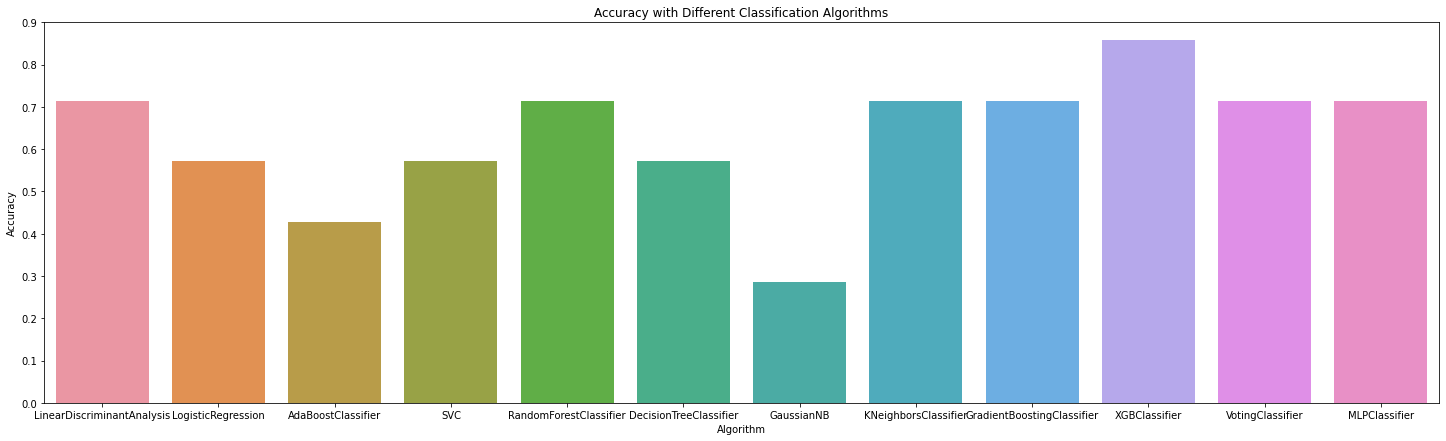

In [189]:
plt.figure(figsize=(25,7))
ax = sns.barplot(x="Algorithm", y="Accuracy", data = Accuracy_df).set(title='Accuracy with Different Classification Algorithms')